In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Upload clean dataset 

In [2]:
data = pd.read_csv("clean_customers.csv")
data = data.drop(columns = "Unnamed: 0")

In [ ]:
data

### Correlation matrix for feature selection

With the correlation matrix we can check which attributes affect the target and whether there are dependent attributes in the dataset

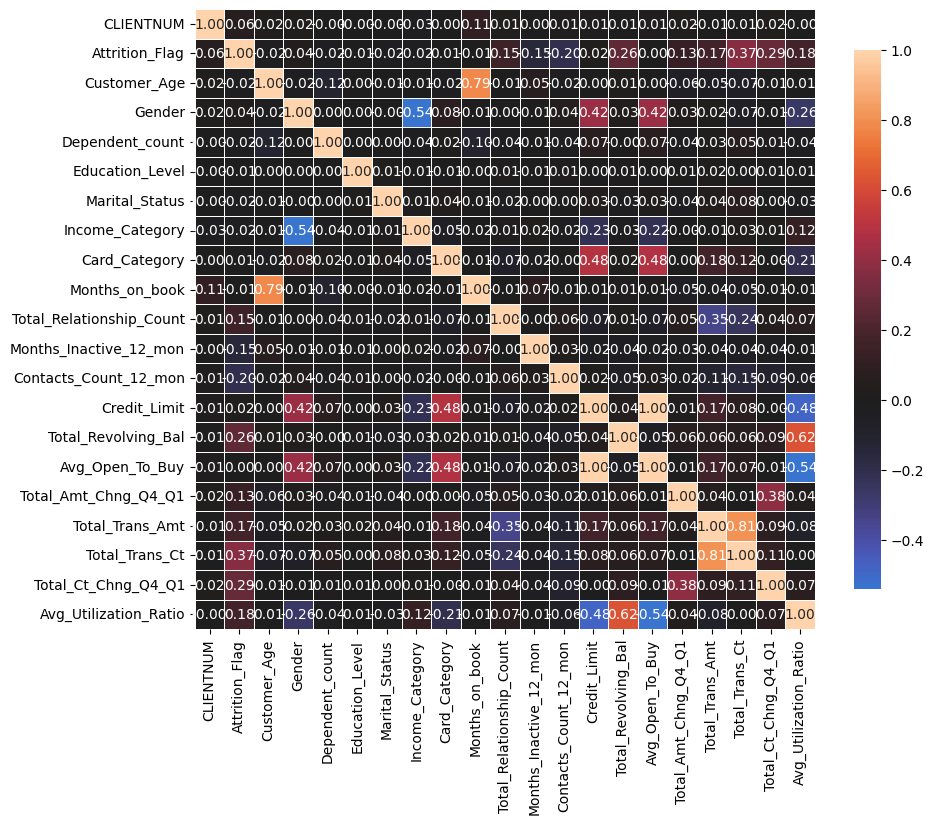

In [3]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(data)

Therefore, we see that the target is influenced by such attributes as:
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Total_Revolving_Bal
- Contacts_Count_12_mon
- Avg_Utilization_Ratio
- Total_Trans_Amt
- Total_Relationship_Count
- Months_Inactive_12_mon

At the same time Total_Trans_Amt and Total_Trans_Ct have hight correlation, therefore we exclude Total_Trans_Amt attribute from modeling (because it affect less to the target).

For modeling we have 7 attributes.

### Feature selection made with SelectKBest function

In [4]:
y = data["Attrition_Flag"]
X = data.drop(['CLIENTNUM','Attrition_Flag'],axis=1)

In [6]:
selector = SelectKBest(score_func=f_classif, k=8)
selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

In [7]:
features_df_new

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,5,1,3,777,1144,42,1.625,0.061
1,6,1,2,864,1291,33,3.714,0.105
2,4,1,0,0,1887,20,2.333,0.000
3,3,4,1,2517,1171,20,2.333,0.760
4,5,1,0,0,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...
10122,3,2,3,1851,15476,117,0.857,0.462
10123,4,2,3,2186,8764,69,0.683,0.511
10124,5,3,4,0,10291,60,0.818,0.000
10125,4,3,3,0,8395,62,0.722,0.000


We obtain the same result

### Forming dataset with selected features

In [12]:
selected_data = data[['Total_Trans_Ct',
                    'Total_Ct_Chng_Q4_Q1',
                    'Total_Revolving_Bal',
                    'Contacts_Count_12_mon',
                    'Avg_Utilization_Ratio',
                    'Total_Relationship_Count',
                    'Months_Inactive_12_mon',
                    'Attrition_Flag']]

In [13]:
selected_data

,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Contacts_Count_12_mon,Avg_Utilization_Ratio,Total_Relationship_Count,Months_Inactive_12_mon,Attrition_Flag
0,42,1.625,777,3,0.061,5,1,1
1,33,3.714,864,2,0.105,6,1,1
2,20,2.333,0,0,0.000,4,1,1
3,20,2.333,2517,1,0.760,3,4,1
4,28,2.500,0,0,0.000,5,1,1
...,...,...,...,...,...,...,...,...
10122,117,0.857,1851,3,0.462,3,2,1
10123,69,0.683,2186,3,0.511,4,2,0
10124,60,0.818,0,4,0.000,5,3,0
10125,62,0.722,0,3,0.000,4,3,0


### Split data for train and test sets

In [33]:
df_train, df_test = train_test_split(selected_data, test_size=0.2, random_state=42)

### Undersampling balancing

In [34]:
# function for undersampling

def undersampling(data):
    us_data = data.sample(frac=1, random_state=4)
    length = len(data[data['Attrition_Flag'] == 0])
    exist = us_data.loc[us_data['Attrition_Flag'] == 1][:length]
    attr = us_data.loc[us_data['Attrition_Flag'] == 0]

    normal_distributed_df = pd.concat([exist, attr])

    # Shuffle dataframe rows
    us_data2 = normal_distributed_df.sample(frac=1, random_state=42)

    return us_data2


In [35]:
us_train_data = undersampling(df_train)
us_test_data = undersampling(df_test)

In [36]:
print('Train\n', us_train_data.groupby('Attrition_Flag').size())
print('Test\n',us_test_data.groupby('Attrition_Flag').size())

Train
 Attrition_Flag
0    1300
1    1300
dtype: int64
Test
 Attrition_Flag
0    327
1    327
dtype: int64


#### Save undersampled datasets

In [37]:
us_train_data.to_csv('us_train_data.csv', ',')
us_test_data.to_csv('us_test_data.csv', ',')


### Oversampling balancing

In [ ]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(credit_df.drop('Class', axis=1), credit_df['Class'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = normalized_df.columns